In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

import itertools
import json
import matplotlib
import numpy as np
import pandas as pd
plt.style.use('ggplot')

In [2]:
import librosa
import librosa.display

from glob import glob

## Sample Tracks

In [3]:
jp_tracks = glob('tracks/jp/*.mp3')
random_idx = np.random.choice(100, 4)

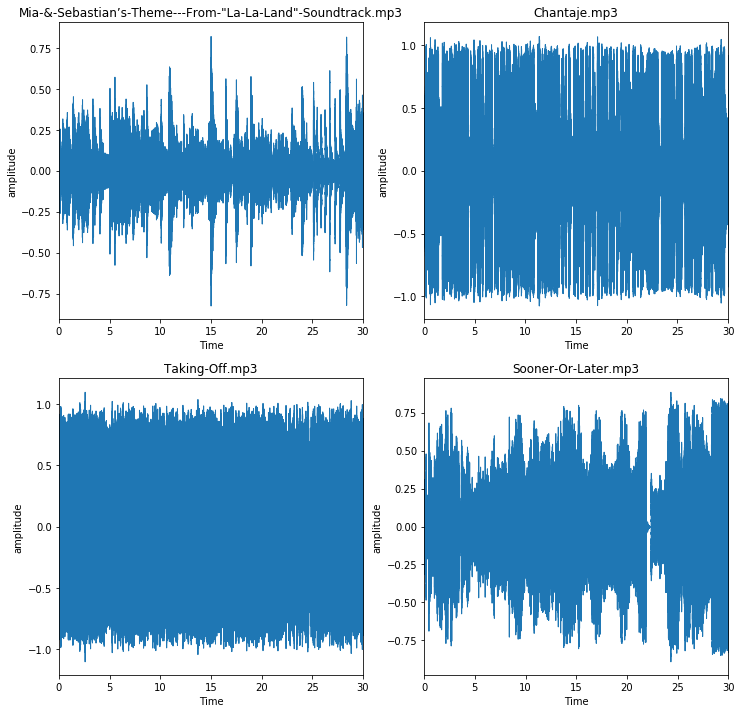

In [4]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    jp_track = jp_tracks[idx]
    y, sr = librosa.load(jp_track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(jp_track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [5]:
uk_tracks = glob('tracks/uk/*.mp3')
random_idx = np.random.choice(100, 4)

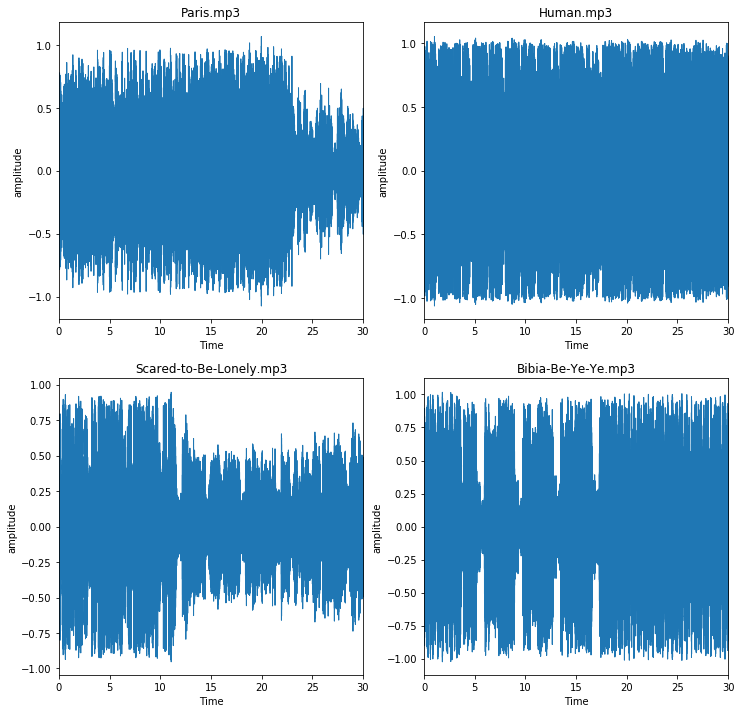

In [6]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    uk_track = uk_tracks[idx]
    y, sr = librosa.load(uk_track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(uk_track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [7]:
us_tracks = glob('tracks/us/*.mp3')
random_idx = np.random.choice(100, 4)

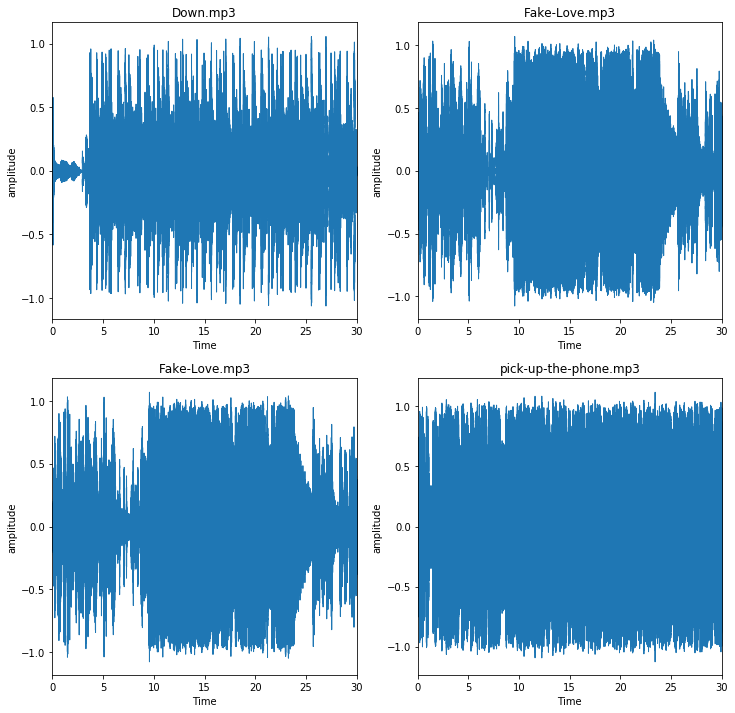

In [8]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    us_track = us_tracks[idx]
    y, sr = librosa.load(us_track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(us_track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [9]:
# def moments(x):
#     mean = x.mean()
#     std = x.var()**0.5
#     skewness = ((x - mean)**3).mean() / std**3
#     kurtosis = ((x - mean)**4).mean() / std**4
#     return [mean, std, skewness, kurtosis]

# def fftfeatures(wavdata):
#     f = np.fft.fft(wavdata)
#     f = f[2:(f.size / 2 + 1)]
#     f = abs(f)
#     total_power = f.sum()
#     f = np.array_split(f, 10)
#     return [e.sum() / total_power for e in f]

# def features(x):
#     x = np.array(x)
#     f = []

#     xs = x
#     diff = xs[1:] - xs[:-1]
#     f.extend(moments(xs))
#     f.extend(moments(diff))

#     xs = x.reshape(-1, 10).mean(1)
#     diff = xs[1:] - xs[:-1]
#     f.extend(moments(xs))
#     f.extend(moments(diff))

#     xs = x.reshape(-1, 100).mean(1)
#     diff = xs[1:] - xs[:-1]
#     f.extend(moments(xs))
#     f.extend(moments(diff))

#     xs = x.reshape(-1, 1000).mean(1)
#     diff = xs[1:] - xs[:-1]
#     f.extend(moments(xs))
#     f.extend(moments(diff))

#     f.extend(fftfeatures(x))
#     return f

In [3]:
def features(x, sr):
    x = np.array(x)
    f = []
    # bpm, spectral_centroid_mean, spectral_centroid_std, rolloff_mean, rolloff_std, zero_crossing_rate_mean, zero_crossing_rate_std
    bpm = librosa.beat.tempo(x, sr)
    
    spectral_centroid = librosa.feature.spectral_centroid(x, sr)[0]
    spectral_centroid_mean = spectral_centroid.mean()
    spectral_centroid_std = spectral_centroid.std()
    
    spectral_rolloff = librosa.feature.spectral_rolloff(x, sr)[0]
    spectral_rolloff_mean = spectral_rolloff.mean()
    spectral_rolloff_std = spectral_rolloff.std()
    
    zero_crossing_rate = librosa.feature.zero_crossing_rate(x)[0]
    zero_crossing_rate_mean = zero_crossing_rate.mean()
    zero_crossing_rate_std = zero_crossing_rate.std()
    
    f.append(bpm)
    f.append(spectral_centroid_mean)
    f.append(spectral_centroid_std)
    f.append(spectral_rolloff_mean)
    f.append(spectral_rolloff_std)
    f.append(zero_crossing_rate_mean)
    f.append(zero_crossing_rate_std)
    
    return f

## List of wavs

Need (mean, standard deviation, skewness and kurtosis)

In [5]:
tracks = glob('tracks/*.mp3')

In [6]:
len(tracks)

189

In [7]:
data = []

for track in tracks:
    y, sr = librosa.load(track)
    data.append(features(y, sr=sr))

In [8]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

In [9]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(pca.explained_variance_ratio_)

[  8.37312617e-01   1.50607539e-01   8.93073127e-03   2.90569568e-03
   2.43417540e-04   1.02550836e-10   3.00312033e-11]


In [11]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.83731262,  0.98792016,  0.99685089,  0.99975658,  1.        ,
        1.        ,  1.        ])

In [12]:
data_f = pca.transform(data)

In [17]:
def inspect(data):
    _, nc = data.shape
    fig, ax = plt.subplots(nc,nc,figsize=(30,30))
    for i in range(nc):
        for j in range(nc):
            if i != j:
                ax[i][j].scatter(data[:,i], data[:,j])
            else:
                ax[i][j].hist(data[:,i])

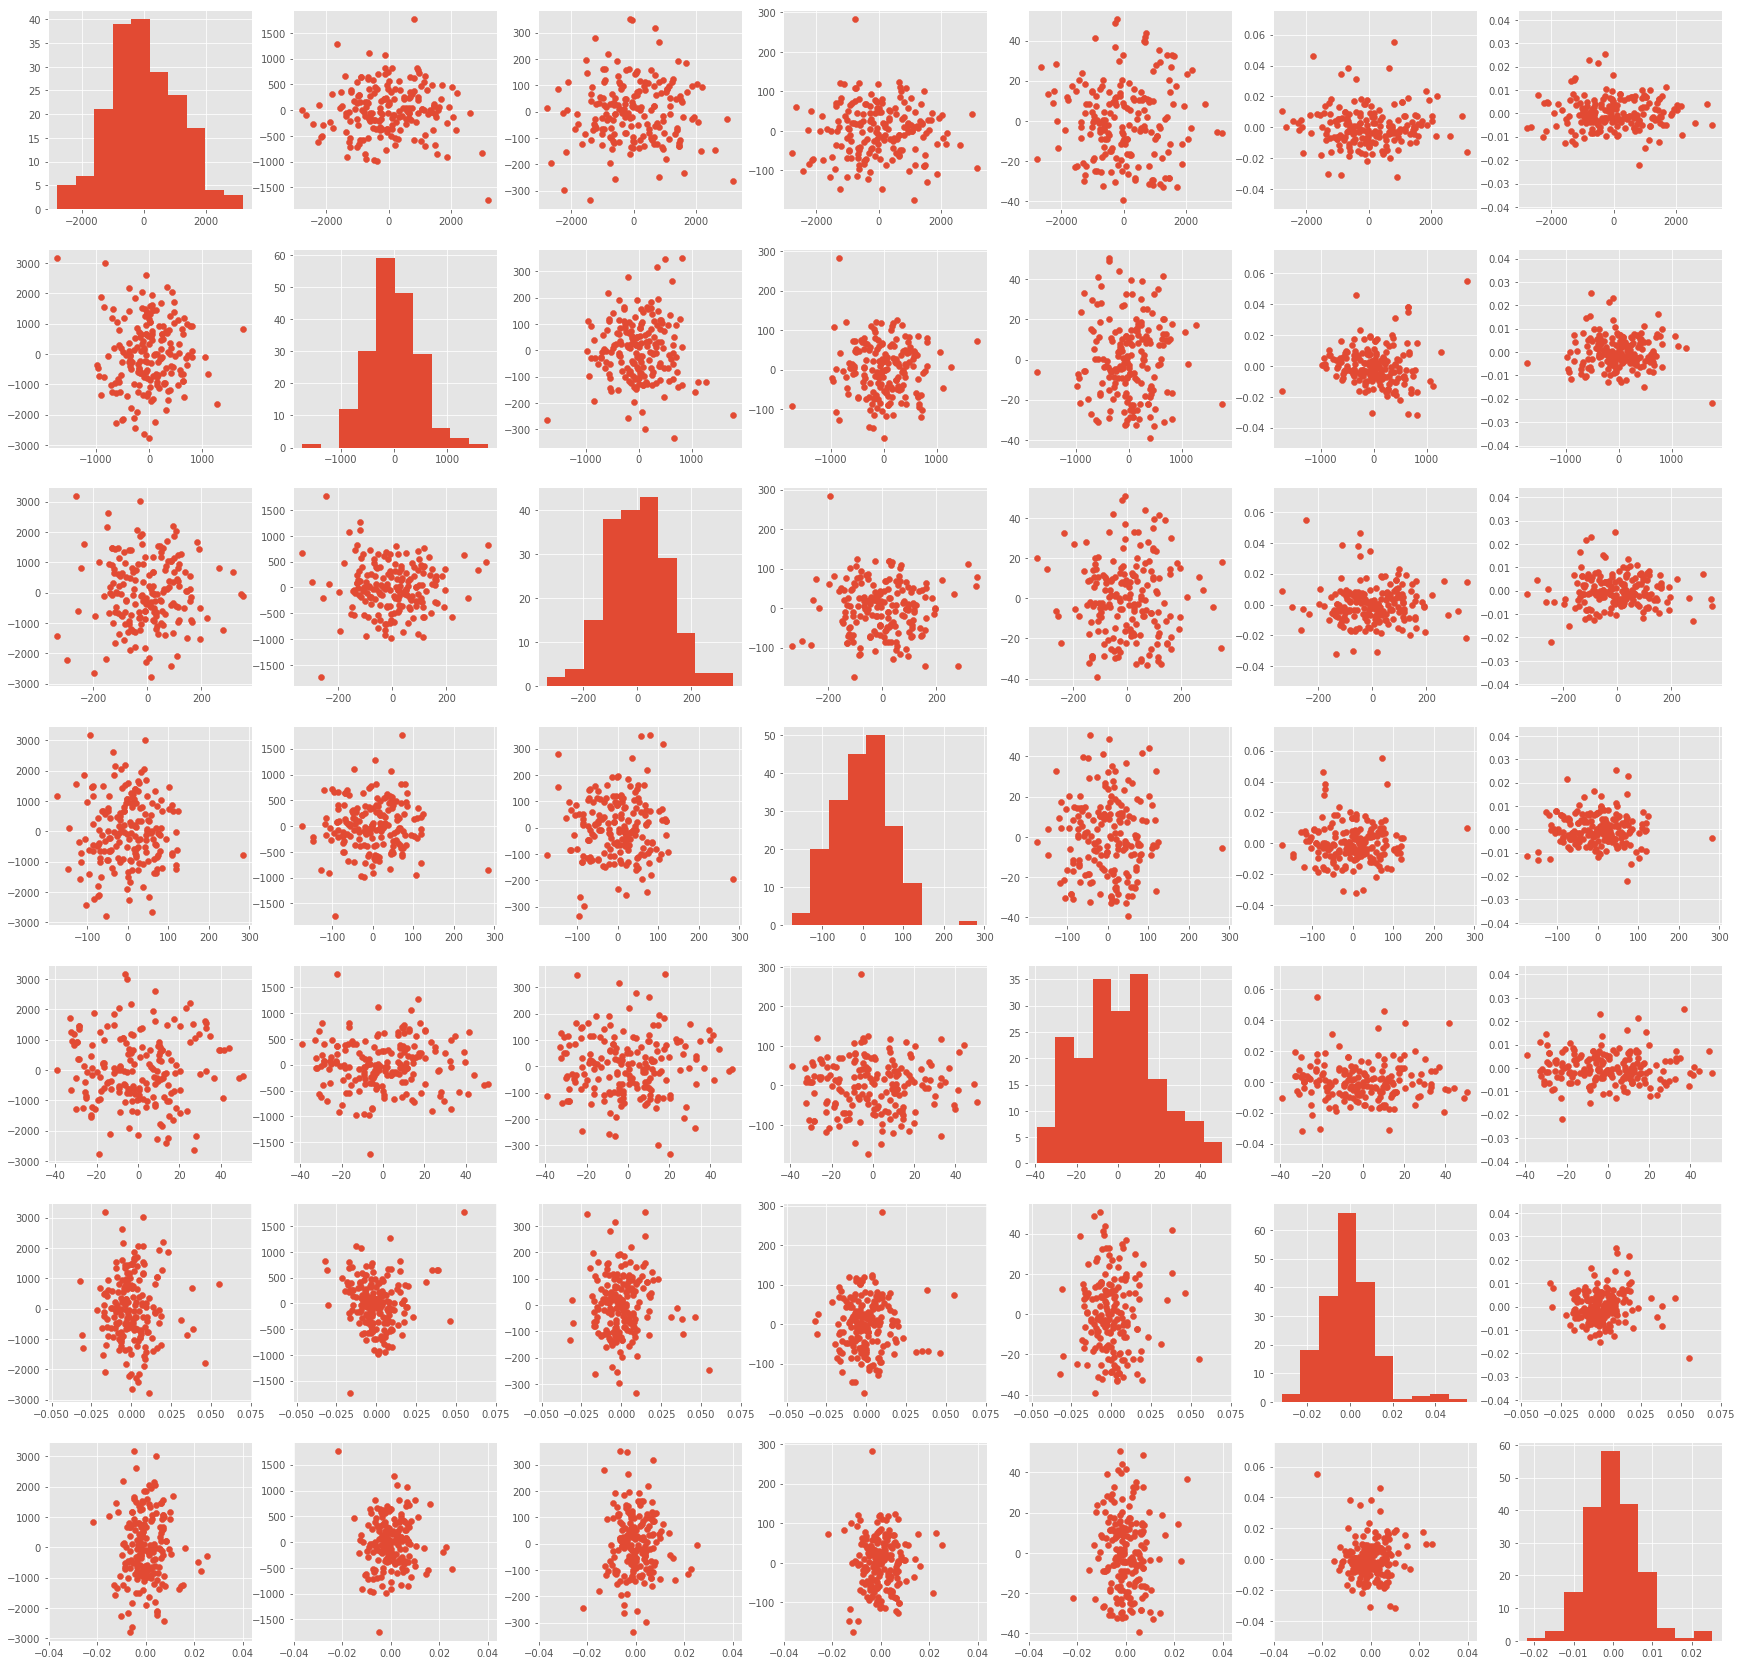

In [14]:
inspect(data_f)

## Recentering and Rescaling

In [15]:
d2 = data - np.mean(data,axis=0)

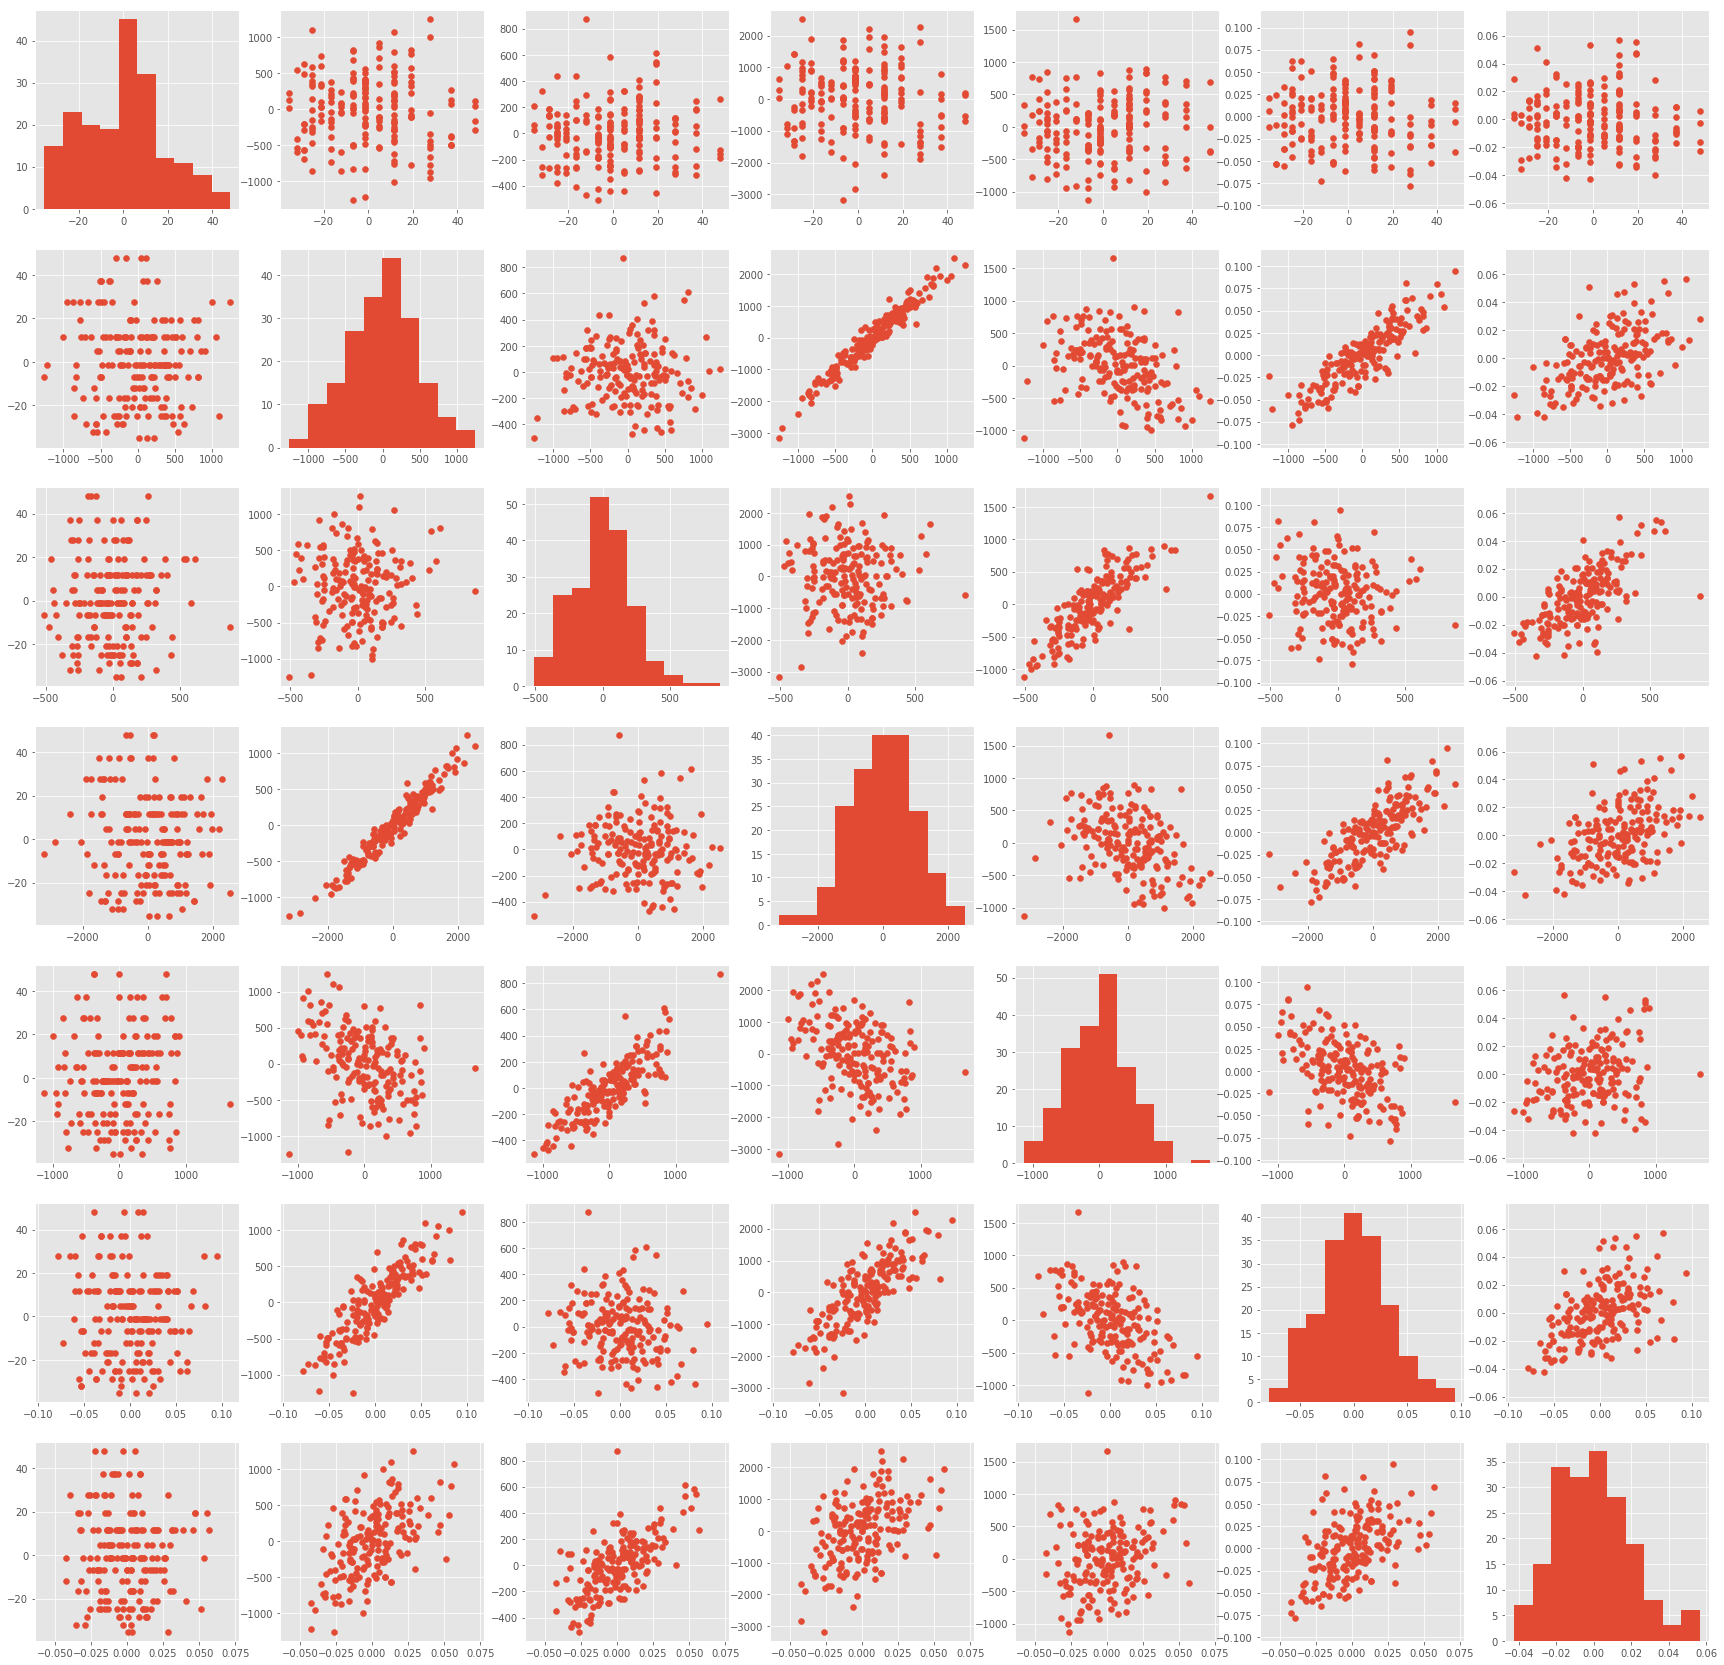

In [16]:
inspect(d2)

In [17]:
# d3 = d2 / np.std(d2,axis=0) # z score

In [18]:
# inspect(d3)

In [19]:
d4 = d2 / np.max(d2,axis=0)

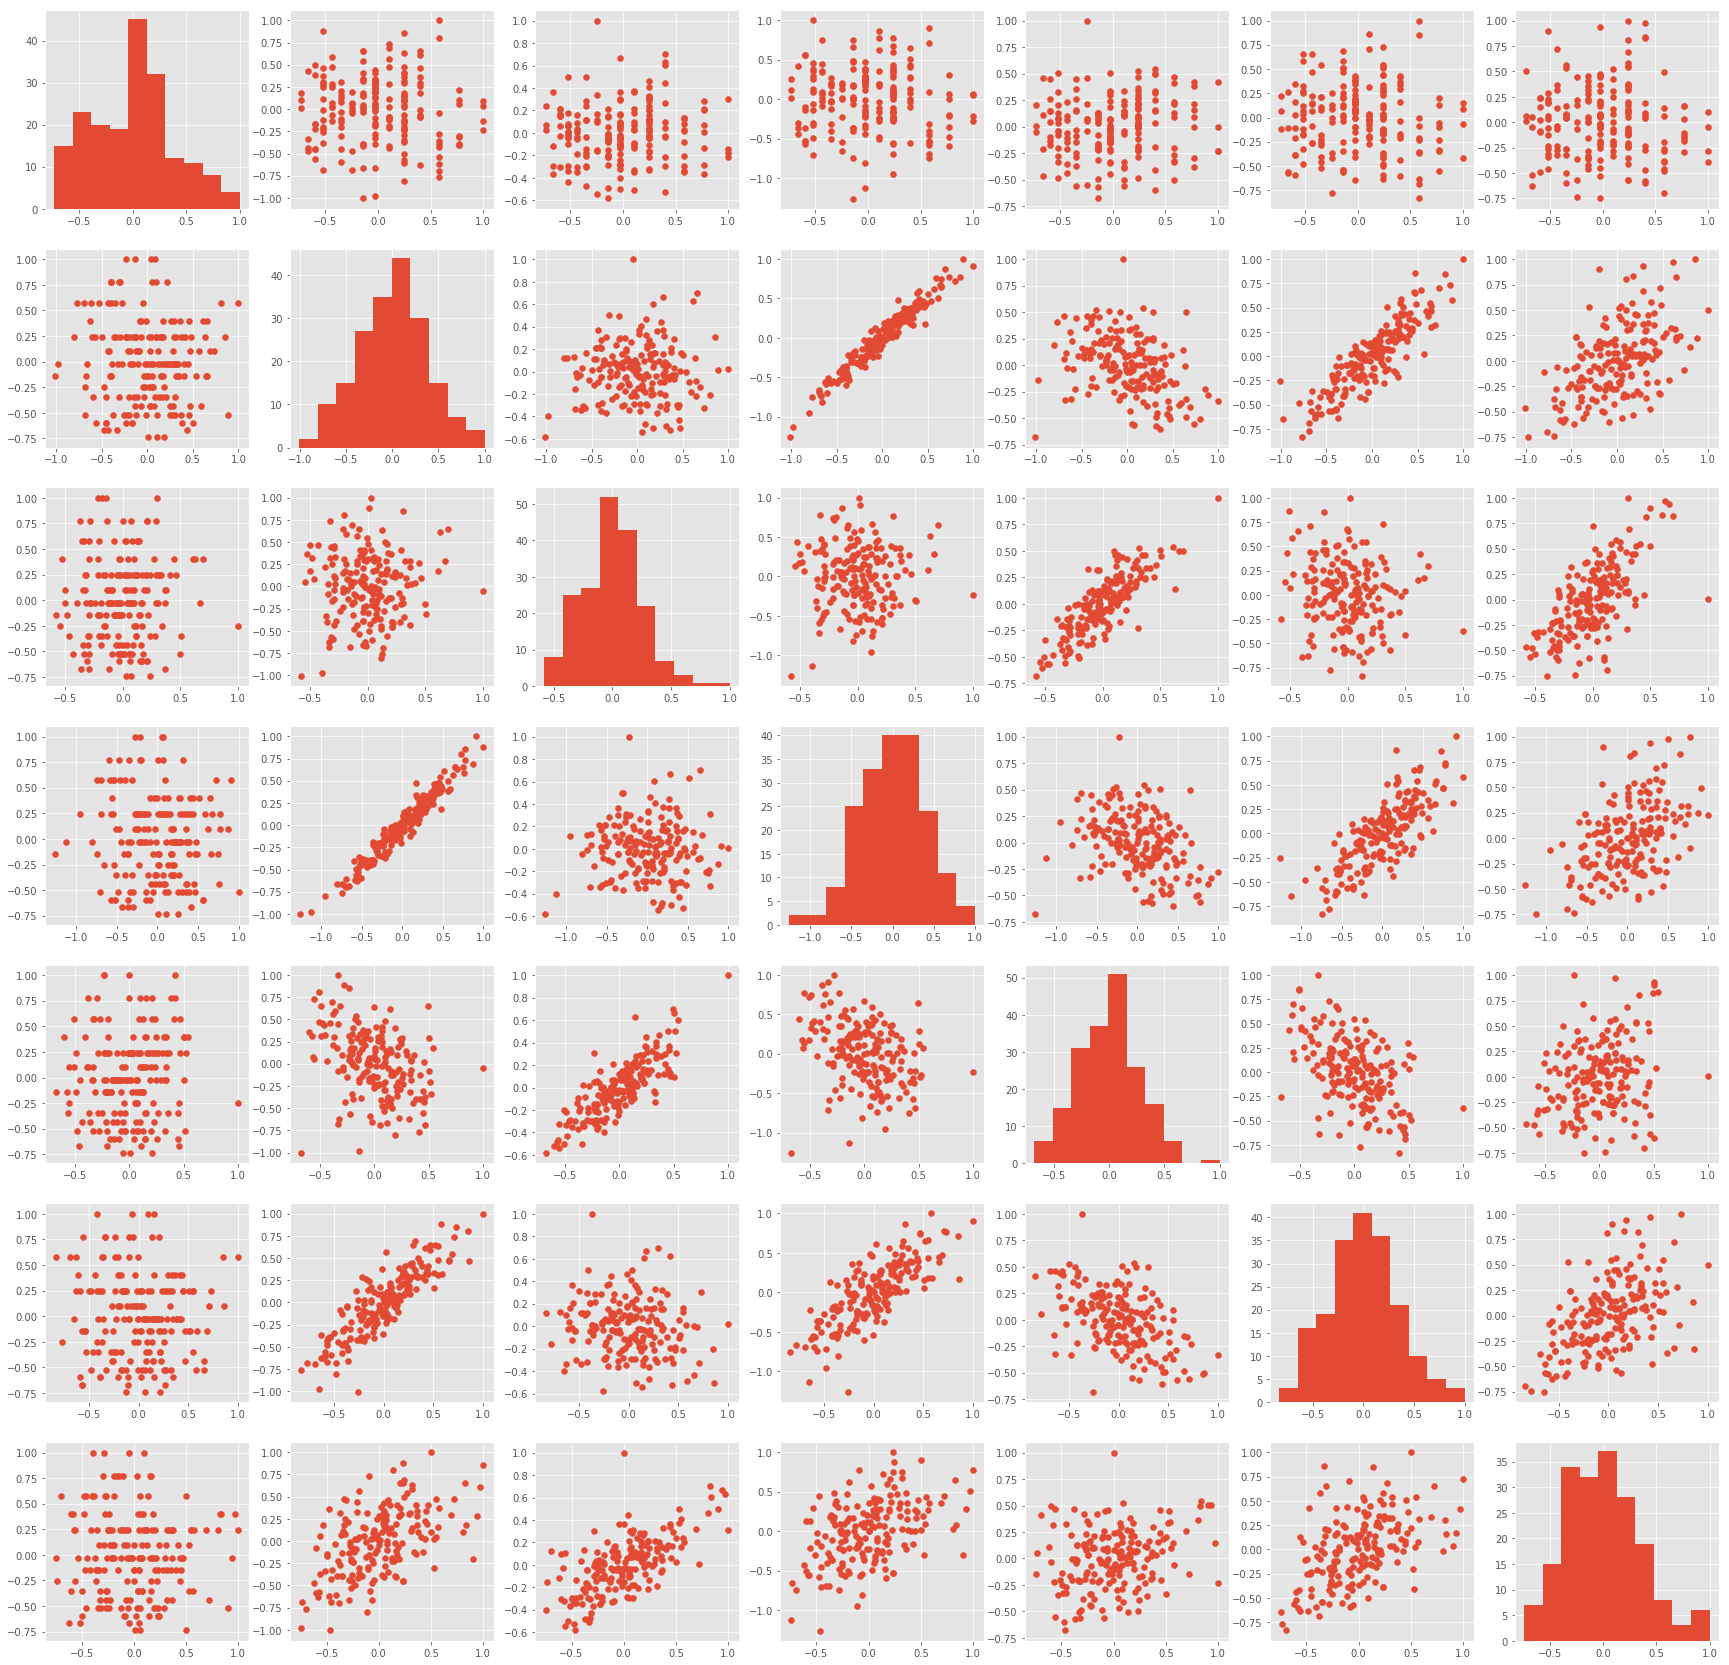

In [20]:
inspect(d4)

In [4]:
rock = glob('tracks/rock/*.mp3')
random_idx = np.random.choice(len(rock), 4)

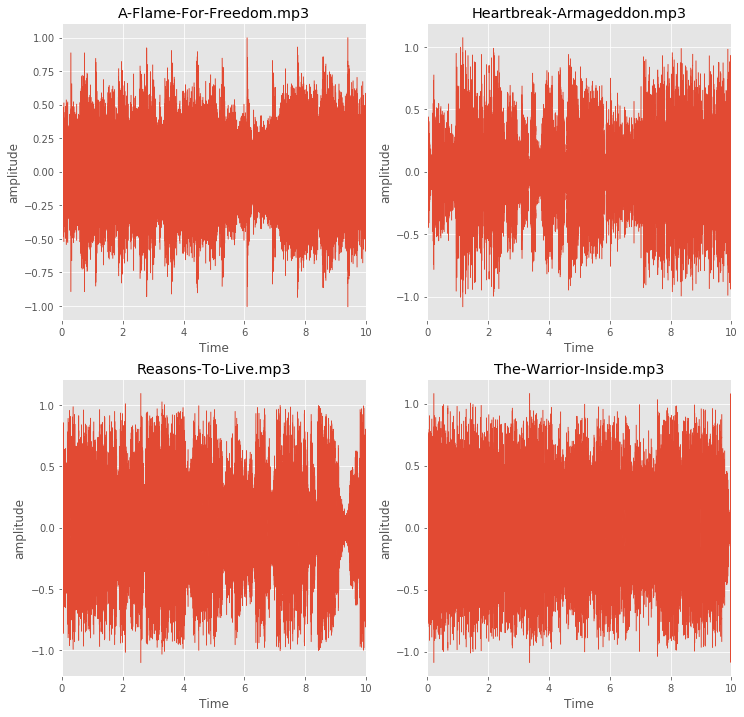

In [5]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    track = rock[idx]
    y, sr = librosa.load(track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [6]:
classical = glob('tracks/classical/*.mp3')
random_idx = np.random.choice(len(classical), 4)

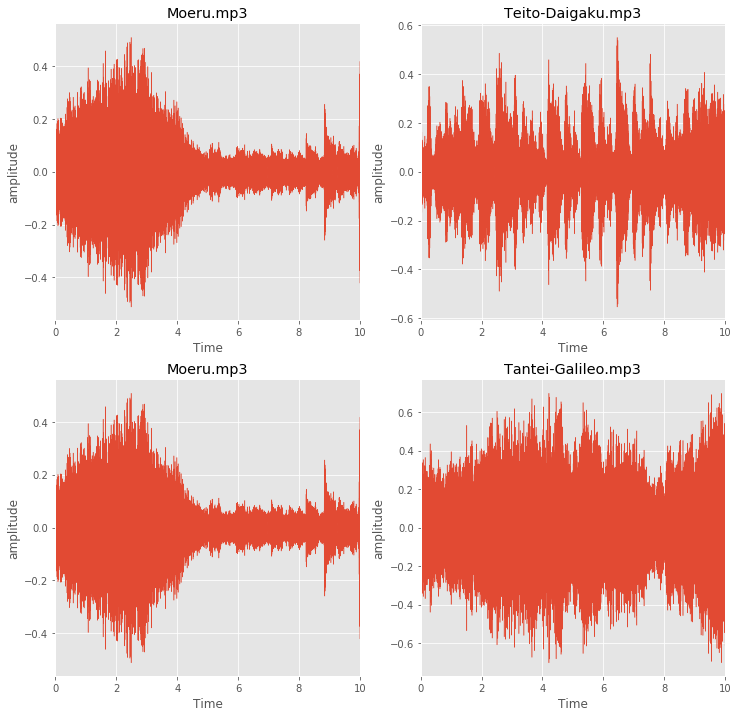

In [7]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    track = classical[idx]
    y, sr = librosa.load(track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [8]:
jazz = glob('tracks/jazz/*.mp3')
random_idx = np.random.choice(len(jazz), 4)

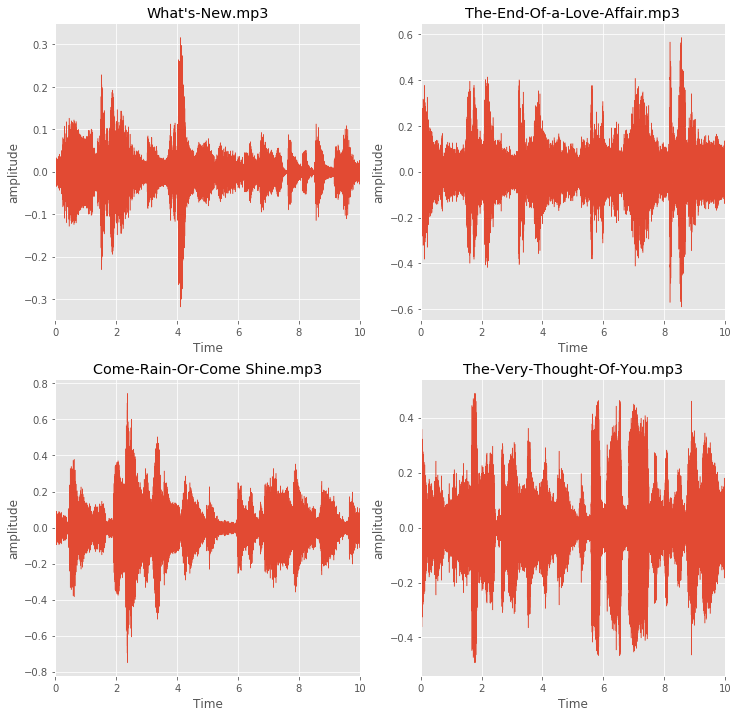

In [9]:
n = 221
plt.figure(figsize=(12, 12))
for idx in random_idx:
    plt.subplot(n)
    track = jazz[idx]
    y, sr = librosa.load(track)
    librosa.display.waveplot(y, sr=sr)
    plt.title(track.split('/')[-1])
    plt.ylabel('amplitude')
    n += 1 

In [10]:
random_idx = np.random.choice(len(jazz), 10)
filter_jazz = [jazz[idx] for idx in random_idx]

In [35]:
tracks = rock + classical + filter_jazz
# tracks = classical + rock

In [36]:
data = []

for track in tracks:
    y, sr = librosa.load(track)
    data.append(features(y, sr=sr))

In [37]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()

In [38]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
data_f = pca.transform(data)

In [40]:
def inspect(data):
    _, nc = data.shape
    fig, ax = plt.subplots(nc,nc,figsize=(30,30))
    for i in range(nc):
        for j in range(nc):
            if i != j:
                ax[i][j].scatter(data[:,i], data[:,j])
            else:
                ax[i][j].hist(data[:,i])

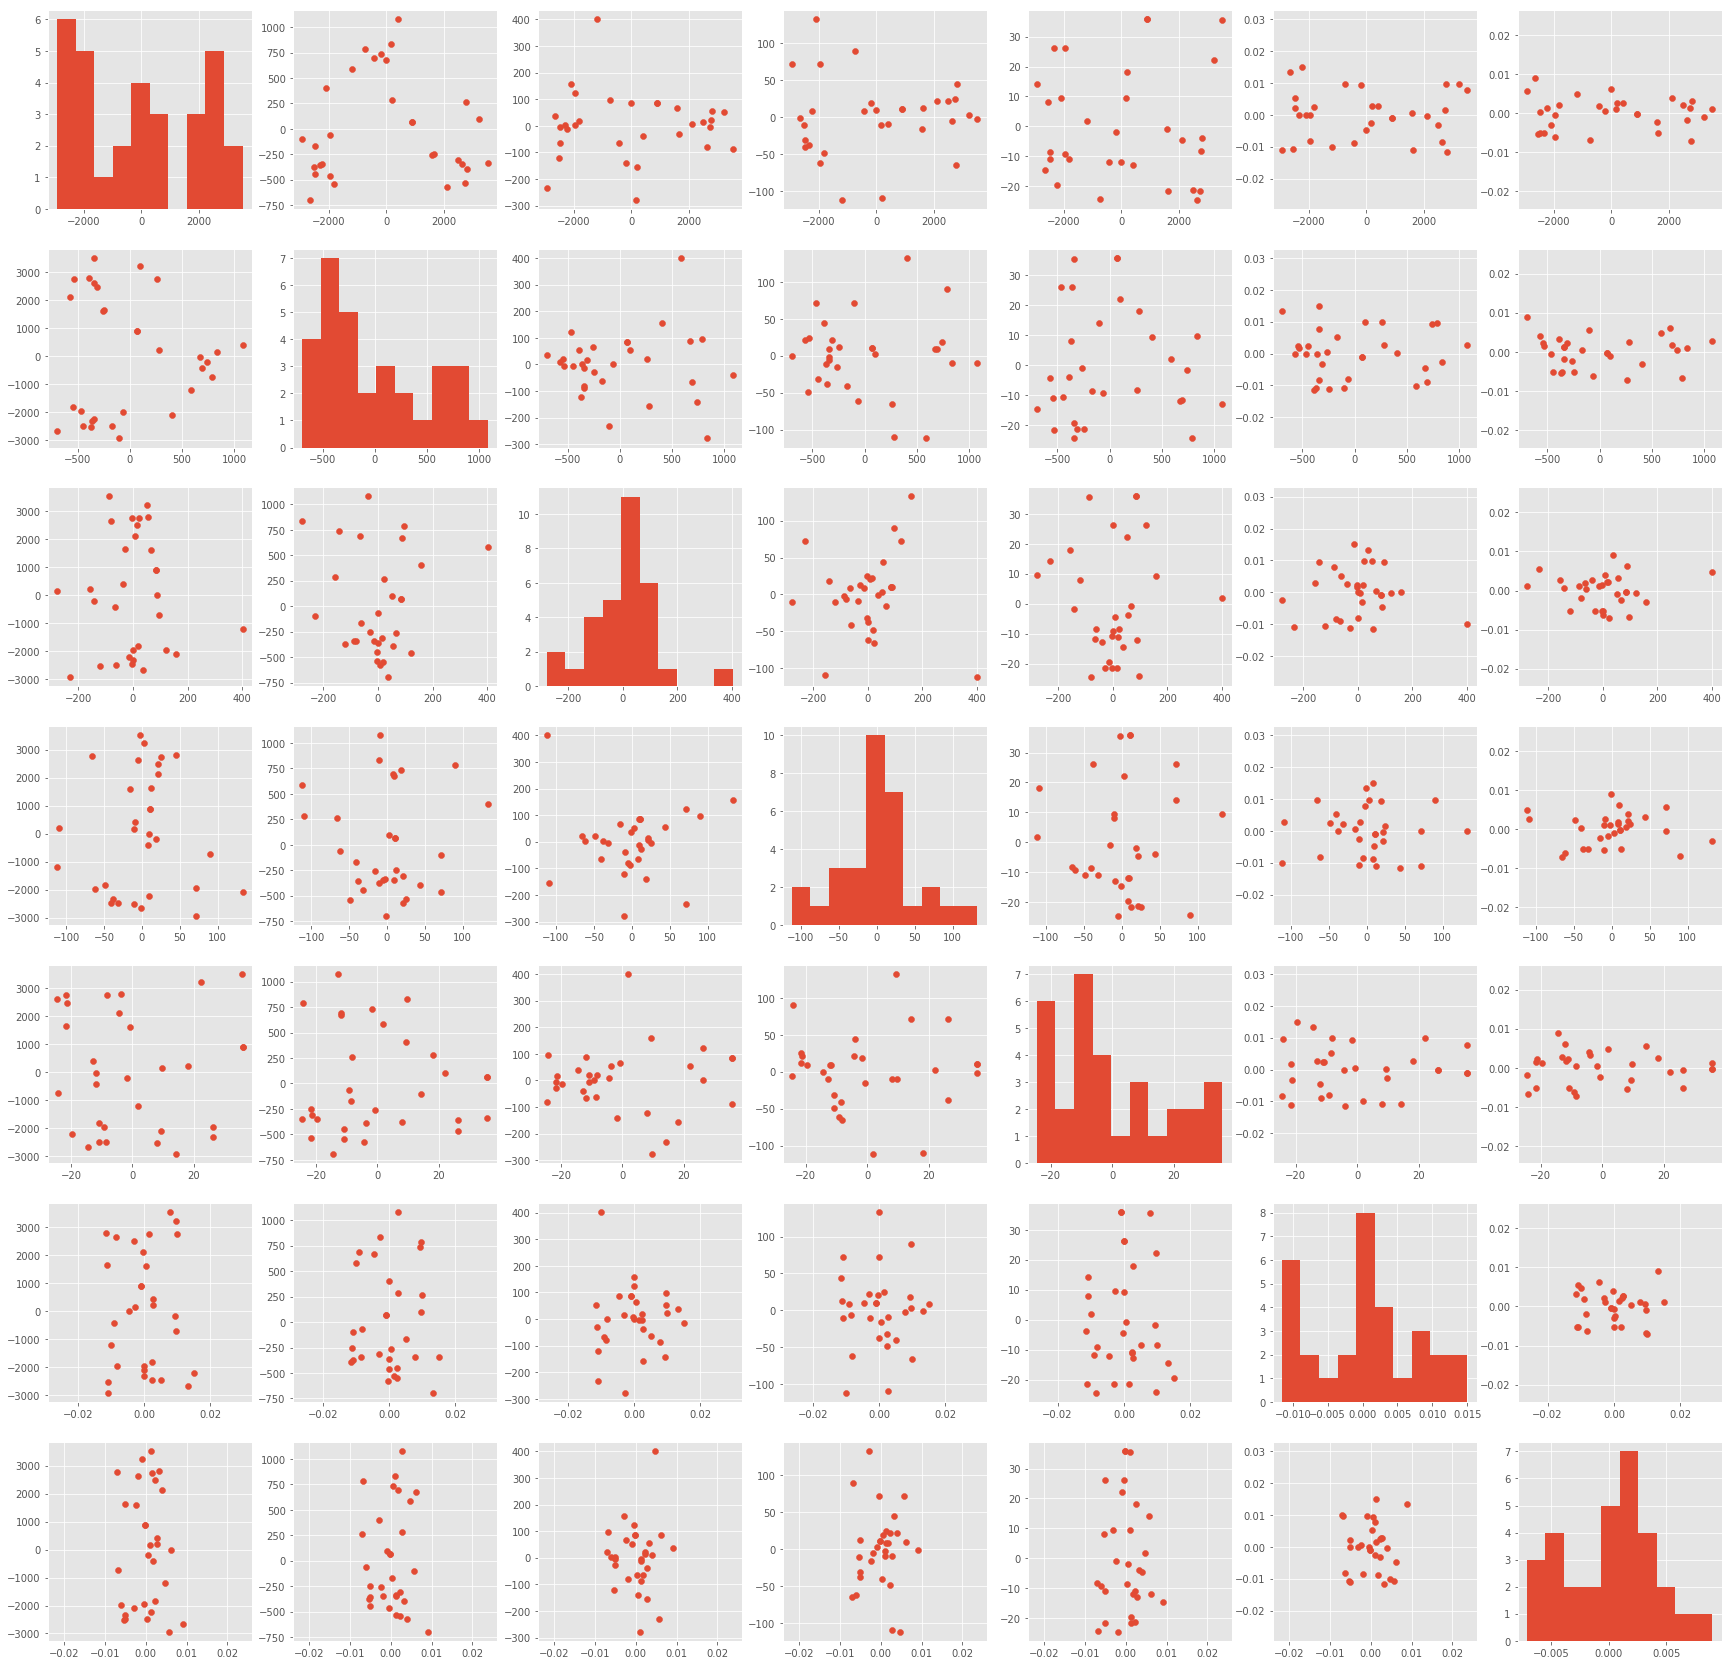

In [41]:
inspect(data_f)